In [1]:
from jst_lib import create_report, create_image
import pandas as pd
import os

def get_paths(main_dir, directories, files):
    paths = {}
    names = []
    for d in directories:
        paths[d] = []
        for f in files:
            paths[d].append(os.path.join(os.getcwd(),main_dir,d,f))
            names.append(f.split('.')[0])
    return paths, names

######## Config #########
main_dir = 'data'
directories = ['2019', '2020']
files = ['gminy.xlsx','powiaty.xlsx','miasta_npp.xlsx','wojewodztwa.xlsx','metropolia.xlsx']

gus_file = os.path.join(os.getcwd(),'data','GUS','tabela12.xls')

out_file = 'report.xlsx'
#########################

paths, names = get_paths(main_dir, directories, files)

In [2]:
paths

{'2019': ['C:\\Users\\bsajniak\\Desktop\\i\\Nauka\\narzedzia\\Project\\data\\2019\\gminy.xlsx',
  'C:\\Users\\bsajniak\\Desktop\\i\\Nauka\\narzedzia\\Project\\data\\2019\\powiaty.xlsx',
  'C:\\Users\\bsajniak\\Desktop\\i\\Nauka\\narzedzia\\Project\\data\\2019\\miasta_npp.xlsx',
  'C:\\Users\\bsajniak\\Desktop\\i\\Nauka\\narzedzia\\Project\\data\\2019\\wojewodztwa.xlsx',
  'C:\\Users\\bsajniak\\Desktop\\i\\Nauka\\narzedzia\\Project\\data\\2019\\metropolia.xlsx'],
 '2020': ['C:\\Users\\bsajniak\\Desktop\\i\\Nauka\\narzedzia\\Project\\data\\2020\\gminy.xlsx',
  'C:\\Users\\bsajniak\\Desktop\\i\\Nauka\\narzedzia\\Project\\data\\2020\\powiaty.xlsx',
  'C:\\Users\\bsajniak\\Desktop\\i\\Nauka\\narzedzia\\Project\\data\\2020\\miasta_npp.xlsx',
  'C:\\Users\\bsajniak\\Desktop\\i\\Nauka\\narzedzia\\Project\\data\\2020\\wojewodztwa.xlsx',
  'C:\\Users\\bsajniak\\Desktop\\i\\Nauka\\narzedzia\\Project\\data\\2020\\metropolia.xlsx']}

In [3]:
names

['gminy',
 'powiaty',
 'miasta_npp',
 'wojewodztwa',
 'metropolia',
 'gminy',
 'powiaty',
 'miasta_npp',
 'wojewodztwa',
 'metropolia']

In [4]:
#################### MAIN REPORT ########################
# without create excel file
#report = create_report(paths, names, directories, gus_file)

# with create excel file
report = create_report(paths, names, directories, gus_file, out_file)

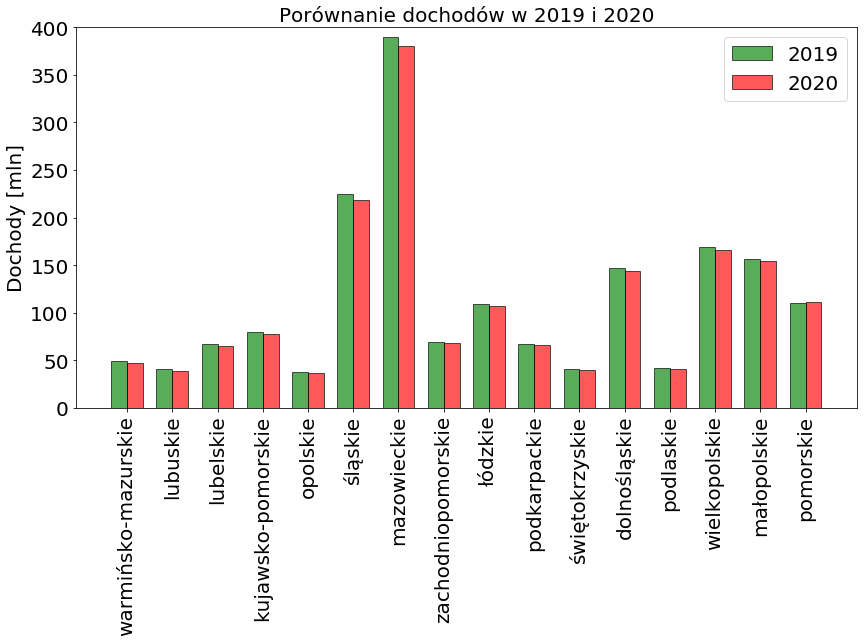

In [5]:
create_image('Porównanie dochodów w 2019 i 2020', 
             'Dochody',
             report['wojewodztwa']['Nazwa JST'],
             report['wojewodztwa']['dochody 2019'],
             report['wojewodztwa']['dochody 2020'],
             labels=['2019','2020']
            )

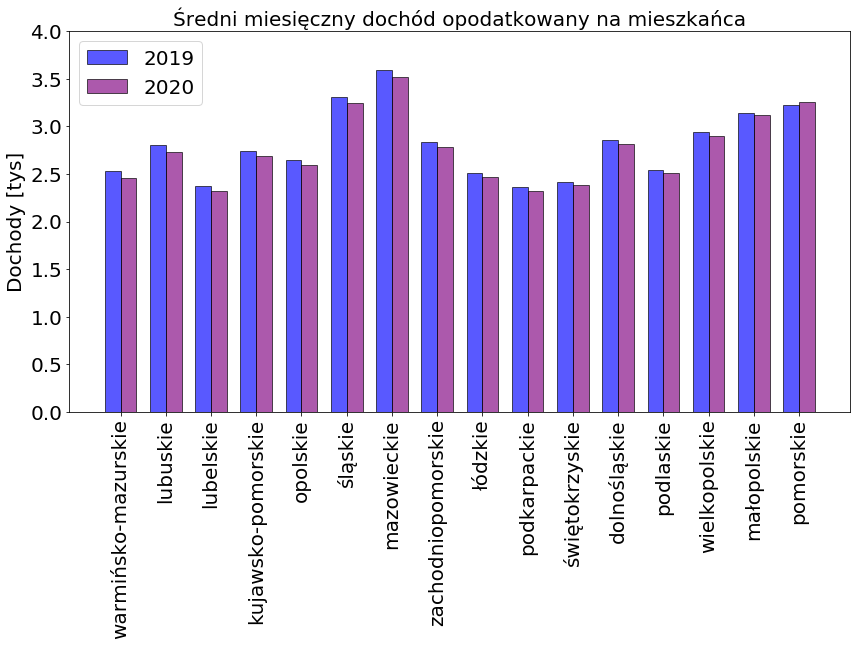

In [6]:
create_image('Średni miesięczny dochód opodatkowany na mieszkańca', 
             'Dochody',
             report['wojewodztwa']['Nazwa JST'],
             report['wojewodztwa']['Średni dochód mieszkańca miesięcznie w 2019'],
             report['wojewodztwa']['Średni dochód mieszkańca miesięcznie w 2020'],
             labels=['2019','2020'],
             c=['blue','purple']
            )

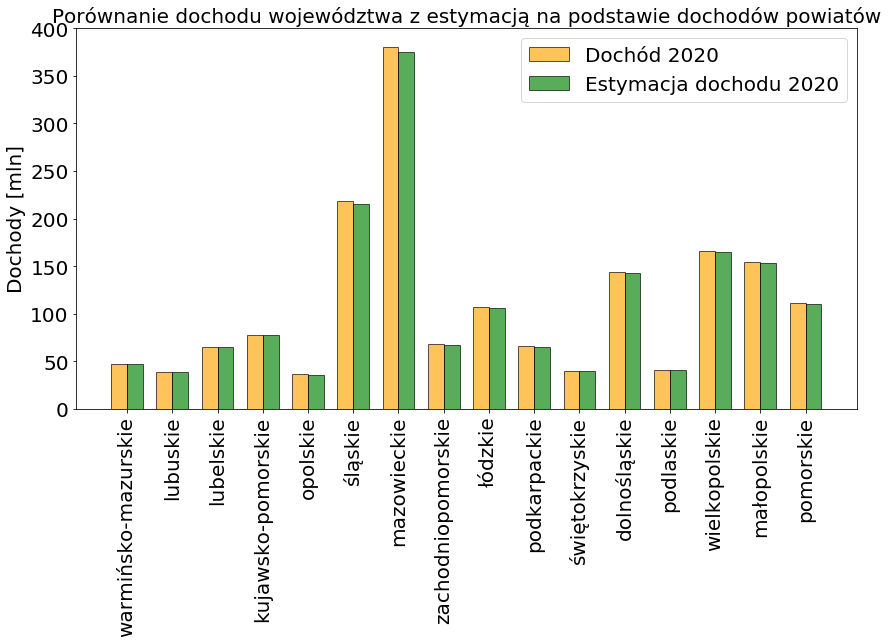

In [7]:
create_image('Porównanie dochodu województwa z estymacją na podstawie dochodów powiatów', 
             'Dochody',
             report['wojewodztwa']['Nazwa JST'],
             report['wojewodztwa']['dochody 2020'],
             report['wojewodztwa']['Estymacja dochodu 2020 na podstawie powiatów'],
             labels=['Dochód 2020','Estymacja dochodu 2020'],
             c=['orange','green']
            )

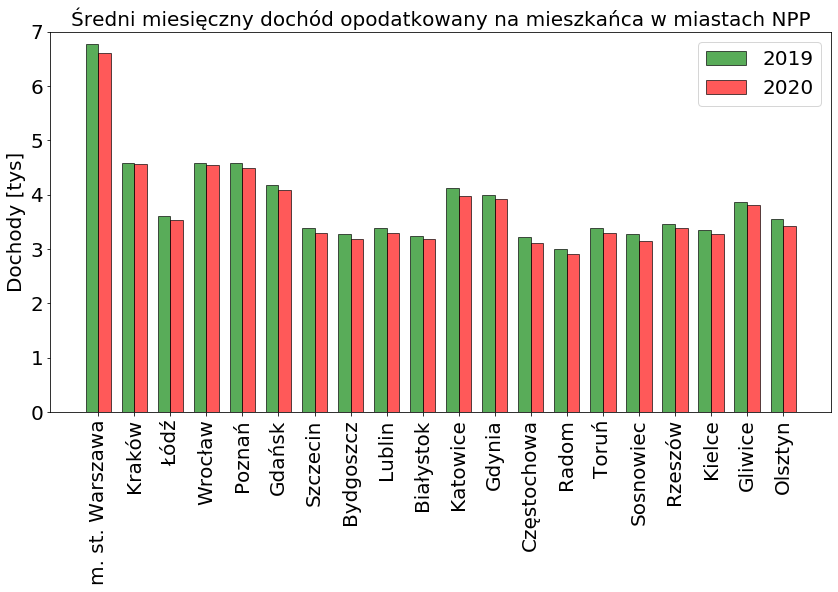

In [8]:
najwieksze_miasta_npp = report['miasta_npp'].copy()
najwieksze_miasta_npp = najwieksze_miasta_npp.sort_values('Ogółem',ascending=False)
najwieksze_miasta_npp = najwieksze_miasta_npp.reset_index(drop=True)
najwieksze_miasta_npp = najwieksze_miasta_npp[:20]
create_image('Średni miesięczny dochód opodatkowany na mieszkańca w miastach NPP', 
             'Dochody',
             najwieksze_miasta_npp['Nazwa JST'],
             najwieksze_miasta_npp['Średni dochód mieszkańca miesięcznie w 2019'],
             najwieksze_miasta_npp['Średni dochód mieszkańca miesięcznie w 2020'],
             labels=['2019','2020'],
            )

In [9]:
report['wojewodztwa'].head(16)

,kod,Nazwa JST,województwo,powiat,dochody 2019,dochody 2020,zmiana,zmiana %,Ogółem,M,...,Średni dochód powiatów 2019,Wariancja dochodu powiatów 2019,Średni dochód gmin 2020,Wariancja dochodu gmin 2020,Średni dochód powiatów 2020,Wariancja dochodu powiatów 2020,Estymacja dochodu 2019 na podstawie gmin,Estymacja dochodu 2019 na podstawie powiatów,Estymacja dochodu 2020 na podstawie gmin,Estymacja dochodu 2020 na podstawie powiatów
0,28,warmińsko-mazurskie,-,-,49259321.0,47344145.0,-1915176.0,-3.887946,1416495.0,692514,...,1.153089e+07,4.777867e+13,6.909204e+06,5.746785e+13,1.113512e+07,4.571873e+13,4.778134e+07,4.887666e+07,4.601281e+07,4.700342e+07
1,08,lubuskie,-,-,40309236.0,38895731.0,-1413505.0,-3.506653,1007145.0,489806,...,1.413852e+07,2.207053e+13,7.625344e+06,5.792393e+13,1.365476e+07,2.079063e+13,3.995240e+07,4.080063e+07,3.781162e+07,3.857884e+07
2,06,lubelskie,-,-,67219899.0,65228210.0,-1991689.0,-2.962946,2095258.0,1015218,...,1.355982e+07,4.929062e+13,4.723849e+06,4.000159e+13,1.325953e+07,5.040018e+13,6.523172e+07,6.658757e+07,6.341941e+07,6.466110e+07
3,04,kujawsko-pomorskie,-,-,80114406.0,77938448.0,-2175958.0,-2.716063,2061942.0,999050,...,1.481043e+07,1.069458e+14,7.361199e+06,7.683855e+13,1.456930e+07,1.027592e+14,7.778806e+07,7.919492e+07,7.581596e+07,7.711207e+07
4,16,opolskie,-,-,37165073.0,36183042.0,-982031.0,-2.642349,976774.0,472035,...,1.708730e+07,5.785120e+13,9.734167e+06,1.117289e+14,1.663872e+07,5.027194e+13,3.602655e+07,3.696625e+07,3.514491e+07,3.600188e+07
5,24,śląskie,-,-,224767214.0,218863771.0,-5903443.0,-2.626470,4492330.0,2163440,...,3.434905e+07,1.420178e+14,1.443218e+07,1.939172e+14,3.374896e+07,1.335139e+14,2.184529e+08,2.213723e+08,2.131005e+08,2.157869e+08
6,14,mazowieckie,-,-,389959220.0,380227237.0,-9731983.0,-2.495641,7219194.0,3422455,...,2.738521e+07,7.945388e+14,1.198907e+07,4.129650e+14,2.689416e+07,7.644574e+14,3.790035e+08,3.840719e+08,3.702165e+08,3.748757e+08
7,32,zachodniopomorskie,-,-,69267913.0,67677173.0,-1590740.0,-2.296503,1688047.0,819848,...,1.448596e+07,5.559912e+13,8.641091e+06,1.334021e+14,1.418419e+07,5.462225e+13,6.723851e+07,6.854211e+07,6.581966e+07,6.701511e+07
8,10,łódzkie,-,-,109394196.0,106927491.0,-2466705.0,-2.254877,3110155.0,1468102,...,1.942239e+07,1.227270e+14,8.585583e+06,1.559893e+14,1.910801e+07,1.184616e+14,1.061932e+08,1.082324e+08,1.039947e+08,1.058736e+08
9,18,podkarpackie,-,-,67137520.0,65682244.0,-1455276.0,-2.167605,2121229.0,1038436,...,1.548844e+07,7.787647e+13,7.627137e+06,8.122438e+13,1.522406e+07,7.481516e+13,6.509248e+07,6.673358e+07,6.380648e+07,6.531990e+07


In [10]:
report['powiaty'].head(20)

,kod,Nazwa JST,województwo,powiat,dochody 2019,dochody 2020,zmiana,zmiana %,Ogółem,M,...,Wiek produkcyjny,Wiek poprodukcyjny,Średni dochód mieszkańca miesięcznie w 2019,Średni dochód mieszkańca miesięcznie w 2020,Średni dochód gmin 2019,Wariancja dochodu gmin 2019,Średni dochód gmin 2020,Wariancja dochodu gmin 2020,Estymacja dochodu 2019 na podstawie gmin,Estymacja dochodu 2020 na podstawie gmin
0,0613,parczewski,lubelskie,-,5739378.0,5077126.0,-662252.0,-11.538742,34372.0,17076,...,20388,7892,2053.209692,1893.220075,3.046071e+06,1.913055e+13,2.700250e+06,1.239228e+13,5.555557e+06,4.924833e+06
1,1407,kozienicki,mazowieckie,-,14902845.0,13523967.0,-1378878.0,-9.252448,59592.0,29519,...,35259,14012,2733.162574,2541.961112,7.909415e+06,1.466250e+14,7.192672e+06,1.202826e+14,1.442553e+07,1.311831e+07
2,1437,żuromiński,mazowieckie,-,6677709.0,6103096.0,-574613.0,-8.604942,38202.0,18851,...,23250,8074,2123.178599,1997.846589,4.134753e+06,1.426003e+13,3.786894e+06,1.189619e+13,6.463836e+06,5.920031e+06
3,0812,wschowski,lubuskie,-,8750336.0,7999764.0,-750572.0,-8.577636,38613.0,19013,...,23295,8024,2575.511879,2411.778078,1.083619e+07,4.453268e+13,9.927500e+06,3.718055e+13,8.470078e+06,7.759803e+06
4,1410,łosicki,mazowieckie,-,5065198.0,4645363.0,-419835.0,-8.288620,30556.0,15196,...,17924,7038,2053.023148,1938.113331,3.136308e+06,1.160011e+13,2.882389e+06,8.968759e+12,4.902972e+06,4.506022e+06
5,1819,strzyżowski,podkarpackie,-,10555326.0,9717240.0,-838086.0,-7.939935,61161.0,30382,...,37944,12152,2106.190981,1991.893690,7.842868e+06,1.476759e+13,7.235311e+06,1.197625e+13,1.021726e+07,9.425767e+06
6,0225,zgorzelecki,dolnośląskie,-,26117516.0,24045677.0,-2071839.0,-7.932757,88386.0,43017,...,53443,21014,3063.190554,2873.080145,1.386140e+07,1.948602e+14,1.278861e+07,1.609410e+14,2.528102e+07,2.332442e+07
7,2005,hajnowski,podlaskie,-,8978725.0,8284259.0,-694466.0,-7.734573,41991.0,20341,...,23743,12220,2372.389290,2240.458936,3.706341e+06,3.320633e+13,3.426852e+06,2.826877e+13,8.691153e+06,8.035768e+06
8,2009,sejneński,podlaskie,-,3194009.0,2958681.0,-235328.0,-7.367794,19689.0,9792,...,12011,4530,1985.981841,1888.777418,2.373227e+06,1.176255e+12,2.202991e+06,9.114636e+11,3.091710e+06,2.869936e+06
9,1609,opolski,opolskie,-,30536952.0,28361829.0,-2175123.0,-7.122921,123532.0,59759,...,77217,26510,2678.014488,2534.747769,8.726828e+06,9.176164e+12,8.122227e+06,7.832258e+12,2.955897e+07,2.751110e+07


In [11]:
report['gminy'].head(20)

,kod,Nazwa JST,województwo,powiat,dochody 2019,dochody 2020,zmiana,zmiana %,Ogółem,M,K,Wiek przedprodukcyjny,Wiek produkcyjny,Wiek poprodukcyjny,Średni dochód mieszkańca miesięcznie w 2019,Średni dochód mieszkańca miesięcznie w 2020
0,2605012,FAŁKÓW,świętokrzyskie,konecki,3252515.0,2159170.0,-1093345.0,-33.615371,4328.0,2154.0,2174.0,684.0,2549.0,1095.0,2255.998583,1721.738755
1,2013042,KLUKOWO,podlaskie,wysokomazowiecki,3638859.0,2713357.0,-925502.0,-25.433852,4255.0,2202.0,2053.0,744.0,2496.0,1015.0,2512.088048,2042.726312
2,1416102,WĄSEWO,mazowieckie,ostrowski,2603886.0,1942940.0,-660946.0,-25.383062,4238.0,2109.0,2129.0,764.0,2514.0,960.0,2001.332321,1662.553309
3,1016032,BUDZISZEWICE,łódzkie,tomaszowski,1708304.0,1291607.0,-416697.0,-24.392438,2161.0,1048.0,1113.0,440.0,1302.0,419.0,2434.633640,2003.383386
4,1413082,SZYDŁOWO,mazowieckie,mławski,3052169.0,2344366.0,-707803.0,-23.190164,4537.0,2288.0,2249.0,868.0,2819.0,850.0,2147.646125,1804.204558
5,2410012,GOCZAŁKOWICE-ZDRÓJ,śląskie,pszczyński,11397230.0,8868526.0,-2528704.0,-22.187005,6735.0,3251.0,3484.0,1237.0,4109.0,1389.0,4357.290026,3538.451233
6,2810032,MRĄGOWO,warmińsko-mazurskie,mrągowski,6559693.0,5105093.0,-1454600.0,-22.174818,8023.0,3948.0,4075.0,1494.0,5154.0,1375.0,2455.223691,2058.614422
7,1429053,KOSÓW LACKI,mazowieckie,sokołowski,5908088.0,4644353.0,-1263735.0,-21.389915,5900.0,2997.0,2903.0,965.0,3536.0,1399.0,2798.042804,2342.143261
8,2005052,DUBICZE CERKIEWNE,podlaskie,hajnowski,926879.0,729262.0,-197617.0,-21.320690,1433.0,715.0,718.0,153.0,743.0,537.0,1955.659521,1680.837348
9,3214053,IŃSKO,zachodniopomorskie,stargardzki,2080585.0,1639590.0,-440995.0,-21.195721,3318.0,1642.0,1676.0,496.0,2055.0,767.0,1979.331469,1701.102694


In [12]:
report['miasta_npp'].head(20)

,kod,Nazwa JST,województwo,powiat,dochody 2019,dochody 2020,zmiana,zmiana %,Ogółem,M,K,Wiek przedprodukcyjny,Wiek produkcyjny,Wiek poprodukcyjny,Średni dochód mieszkańca miesięcznie w 2019,Średni dochód mieszkańca miesięcznie w 2020
0,0862,Zielona Góra,lubuskie,-,278568961.0,243252907.0,-35316054.0,-12.677670,140892.0,66805,74087,25551,81453,33888,4077.264105,3644.879812
1,0664,Zamość,lubelskie,-,75709410.0,69821520.0,-5887890.0,-7.776959,62785.0,29469,33316,10301,36885,15599,2703.756007,2545.332398
2,2861,Elbląg,warmińsko-mazurskie,-,167408335.0,157240951.0,-10167384.0,-6.073404,118582.0,56647,61935,19435,70042,29105,3051.076012,2906.261207
3,2264,Sopot,pomorskie,-,105569847.0,99230393.0,-6339454.0,-6.004985,35286.0,16431,18855,4540,19256,11490,5515.452358,5224.283480
4,1861,Krosno,podkarpackie,-,60540065.0,56905542.0,-3634523.0,-6.003500,45944.0,21668,24276,7526,26467,11951,2892.002210,2758.404183
5,0462,Grudziądz,kujawsko-pomorskie,-,108158733.0,101938450.0,-6220283.0,-5.751069,93564.0,44515,49049,16383,53953,23228,2645.615207,2531.804518
6,0265,Wałbrzych,dolnośląskie,-,130829947.0,123684562.0,-7145385.0,-5.461582,109971.0,51787,58184,16105,63204,30662,2634.905791,2527.408795
7,0464,Włocławek,kujawsko-pomorskie,-,134662441.0,127625632.0,-7036809.0,-5.225517,108561.0,50895,57666,17110,62936,28515,2746.078241,2637.418232
8,1263,Tarnów,małopolskie,-,142717284.0,135368575.0,-7348709.0,-5.149137,107498.0,50795,56703,16782,62492,28224,2888.296670,2773.901889
9,3062,Konin,wielkopolskie,-,98000845.0,93113365.0,-4887480.0,-4.987181,72539.0,34215,38324,11090,41966,19483,2918.808377,2806.489982
